In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt

<Axes: >

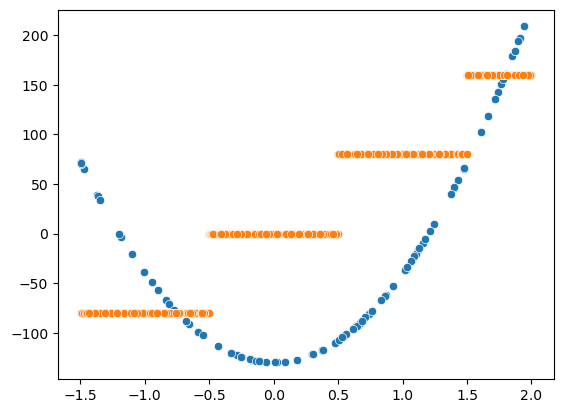

In [27]:
square_simple_train = pd.read_csv('../data/regression/square-simple-training.csv')[['x', 'y']]
steps_large_train = pd.read_csv('../data/regression/steps-large-training.csv')[['x', 'y']]

square_simple_train_X = np.array(square_simple_train['x'])
square_simple_train_Y = np.array(square_simple_train['y'])

steps_large_train_X = np.array(steps_large_train['x'])
steps_large_train_Y = np.array(steps_large_train['y'])

sns.scatterplot(x=square_simple_train_X, y=square_simple_train_Y)
sns.scatterplot(x=steps_large_train_X, y=steps_large_train_Y)

In [ ]:
def sigmoid(x):
	return 1/(1+np.e**(-x))

def linear(x):
	return x

class network:
	def __init__(self):
		pass

	def set_state(self, architecture, biases, weights, activations):
		self.architecture = architecture
		self.biases = biases
		self.weights = weights
		self.activations = activations
		
	def forward(self, X):
		for i in range(0, len(self.architecture)-1):
			X = self.activations[i](np.dot(X, self.weights[i]) + self.biases[i])
		
		return X
	
	def check_MSE(self, y, y_pred):
		return np.mean((y - y_pred) ** 2)
	
	def visualize_network(self):
		G = nx.DiGraph()
		pos = {}
		edge_colors = []
		edge_widths = []
		
		for layer_idx, num_nodes in enumerate(self.architecture):
			for node_idx in range(num_nodes):
				node_name = f"L{layer_idx}_N{node_idx}"
				pos[node_name] = (layer_idx, -node_idx)  
				G.add_node(node_name)
				
				if layer_idx > 0: 
					for prev_idx in range(self.architecture[layer_idx - 1]):
						prev_name = f"L{layer_idx-1}_N{prev_idx}"
						weight = self.weights[layer_idx-1][prev_idx][node_idx]

						if weight != 0:
							G.add_edge(prev_name, node_name)
							edge_colors.append('red' if weight < 0 else 'green')
							edge_widths.append(np.log(abs(weight)))
		
		plt.figure(figsize=(10, 5))
		nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", edge_color=edge_colors, width=edge_widths)
		plt.show()

network_sl = network()
network_ss = network()

In [149]:
# STEPS LARGE

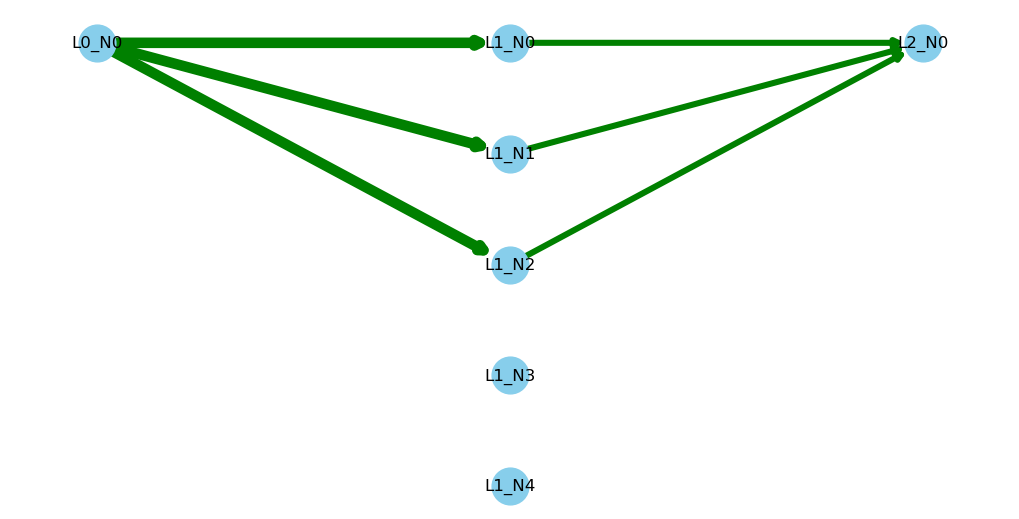

In [191]:
architecture = np.array([1, 5, 1])
activations = [sigmoid, linear]

weights=[
    [[2000, 2000, 2000, 0, 0]],
    [[80], [80], [80], [0], [0]]
] 

biases=[
    [1000, -1000, -3000, 0, 0],
    [-80]
]

network_sl.set_state(architecture, biases, weights, activations)
network_sl.visualize_network()

weights=[
    [[2000, 2000, 2000, 0, 0]],
    [80, 80, 80, 0, 0]
] 
network_sl.set_state(architecture, biases, weights, activations)

In [182]:
steps_large_train_Y_pred = network_sl.forward(steps_large_train_X.reshape(10000,1))

/tmp/ipykernel_8020/2877063462.py:2: RuntimeWarning: overflow encountered in power
  return 1/(1+np.e**(-x))


In [183]:
print('steps_large_train_X size', steps_large_train_X.size)
print('steps_large_train_Y size', steps_large_train_Y.size)
print('steps_large_train_Y_pred size', steps_large_train_Y_pred.size)

steps_large_train_X size 10000
steps_large_train_Y size 10000
steps_large_train_Y_pred size 10000


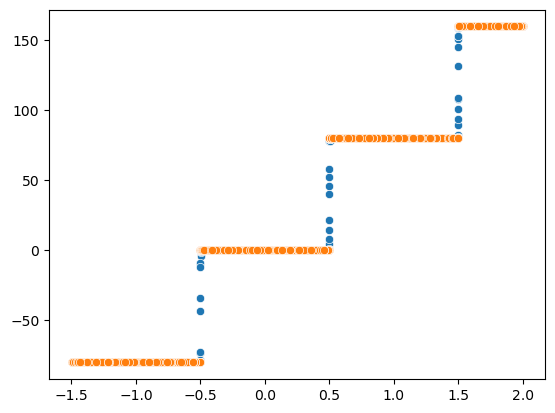

steps large weights [[[2000, 2000, 2000, 0, 0]], [80, 80, 80, 0, 0]]
steps large biases [[1000, -1000, -3000, 0, 0], [-80]]
steps large mse 1.1119852493764608


In [184]:
sns.scatterplot(x=steps_large_train_X.ravel(), y=steps_large_train_Y_pred.ravel())
sns.scatterplot(x=steps_large_train_X, y=steps_large_train_Y)
plt.show()

print('steps large weights', network_sl.weights)
print('steps large biases', network_sl.biases)
print('steps large mse', network_sl.check_MSE(steps_large_train_Y, steps_large_train_Y_pred))

In [ ]:
# SQUARE SIMPLE

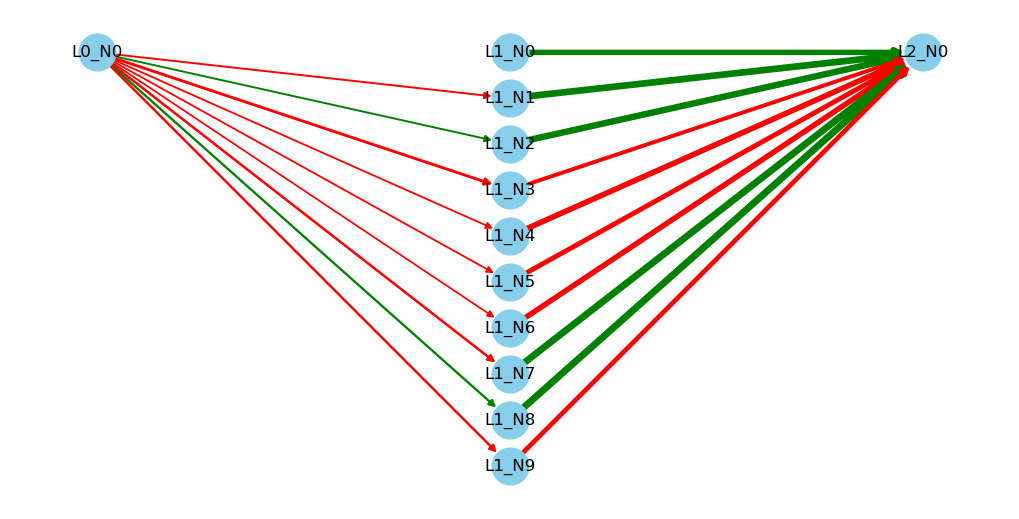

In [192]:
architecture = np.array([1, 10, 1])
activations = [sigmoid, linear]

weights=[
    [[0, -4, 4, -8, -3.7, -3.7, -3.5, -6.2, 5.4, -5.7]],
    [[50.5], [122], [101.5], [-17], [-55], [-33.5], [-49.5], [139.7], [147.6], [-30.3]]
]

biases=[
    [2.5, -3.3, -4.8, 3, 6.5, 4.3, 5.8, -8.5, -10, 4],
    [1.5]
]

network_ss.set_state(architecture, biases, weights, activations)
network_ss.visualize_network()

weights=[
    [[0, -4, 4, -8, -3.7, -3.7, -3.5, -6.2, 5.4, -5.7]],
    [50.5, 122, 101.5, -17, -55, -33.5, -49.5, 139.7, 147.6, -30.3]
]

network_ss.set_state(architecture, biases, weights, activations)

In [175]:
square_simple_train_Y_pred = network_ss.forward(square_simple_train_X.reshape(100,1))

In [176]:
print('steps_large_train_X size', square_simple_train_X.size)
print('steps_large_train_Y size', square_simple_train_Y.size)
print('steps_large_train_Y_pred size', square_simple_train_Y.size)

steps_large_train_X size 100
steps_large_train_Y size 100
steps_large_train_Y_pred size 100


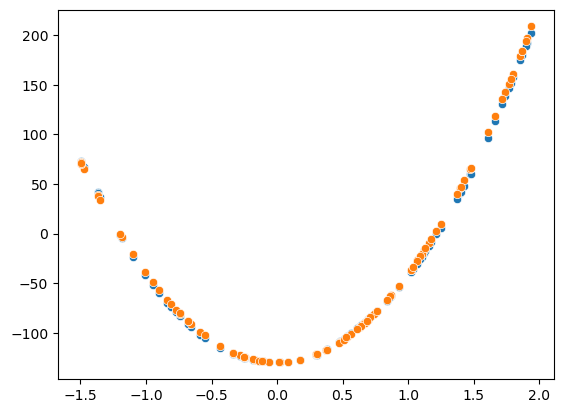

steps large weights [[[0, -4, 4, -8, -3.7, -3.7, -3.5, -6.2, 5.4, -5.7]], [50.5, 122, 101.5, -17, -55, -33.5, -49.5, 139.7, 147.6, -30.3]]
steps large biases [[2.5, -3.3, -4.8, 3, 6.5, 4.3, 5.8, -8.5, -10, 4], [1.5]]
steps large mse 7.762745551755081


In [177]:
sns.scatterplot(x=square_simple_train_X.ravel(), y=square_simple_train_Y_pred.ravel())
sns.scatterplot(x=square_simple_train_X, y=square_simple_train_Y)
plt.show()

print('steps large weights', network_ss.weights)
print('steps large biases', network_ss.biases)
print('steps large mse', network_ss.check_MSE(square_simple_train_Y, square_simple_train_Y_pred))